In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.DataFrame(pd.read_csv('clean_data.csv'))

x = StandardScaler().fit_transform(df)

x


array([[-1.72600524, -1.64777909,  0.53223157, -0.45661307,  1.29056424],
       [-1.71389292, -0.65772695, -0.41913236, -0.45661307, -0.0664261 ],
       [-1.7017806 , -0.65772695, -0.41913236, -0.45661307, -0.0664261 ],
       ...,
       [ 1.7017806 ,  1.32237733, -0.41913236, -0.45661307, -1.42341644],
       [ 1.71389292, -0.65772695,  0.53223157,  0.41399585,  1.29056424],
       [ 1.72600524,  0.33232519,  0.53223157,  0.41399585,  1.29056424]])

In [2]:
import pandas as pd

########## Reading in Data ###################
data2 = pd.read_csv('breast-cancer.csv')
df2 = pd.DataFrame(data2)
data_class = df2['Class'] 

data_class

0      no-recurrence-events
1      no-recurrence-events
2      no-recurrence-events
3      no-recurrence-events
4      no-recurrence-events
               ...         
281       recurrence-events
282       recurrence-events
283       recurrence-events
284       recurrence-events
285       recurrence-events
Name: Class, Length: 286, dtype: object

In [3]:
pca = PCA(n_components = 2)

In [4]:
principal_components = pca.fit_transform(x)

In [5]:
principal_df = pd.DataFrame(data = principal_components, columns = ['Principal Component #1', 'Principal Component #2'])

In [7]:
final_df = pd.concat([principal_df, data_class], axis = 1)

In [8]:
final_df

,Principal Component #1,Principal Component #2,Class
0,-0.082116,-1.418963,no-recurrence-events
1,-1.269219,-0.737748,no-recurrence-events
2,-1.262627,-0.738101,no-recurrence-events
3,-1.711847,1.021631,no-recurrence-events
4,-1.947876,-1.267394,no-recurrence-events
...,...,...,...
281,1.066369,-1.518465,recurrence-events
282,1.427622,-1.782858,recurrence-events
283,-0.395346,1.054628,recurrence-events
284,2.109970,-0.491670,recurrence-events


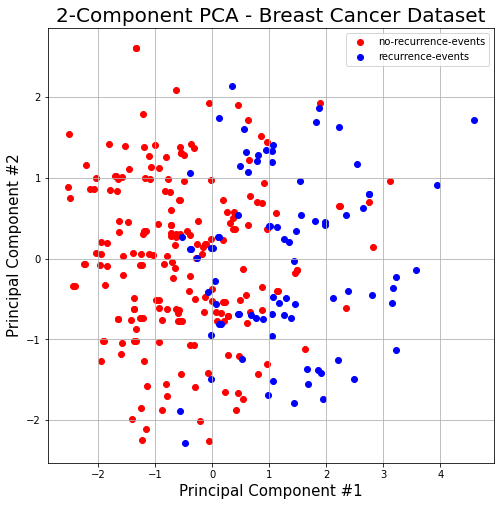

In [14]:
import matplotlib.pyplot as plt 

figure = plt.figure(figsize = (8, 8))
fig = figure.add_subplot(1, 1, 1)
fig.set_xlabel('Principal Component #1', fontsize = 15)
fig.set_ylabel('Principal Component #2', fontsize = 15)
fig.set_title('2-Component PCA - Breast Cancer Dataset', fontsize = 20)

targets = ['no-recurrence-events', 'recurrence-events']
colors = ['r', 'b']
for target, color in zip(targets, colors):
    indices_to_keep = final_df['Class'] == target
    fig.scatter(final_df.loc[indices_to_keep, 'Principal Component #1'],
                    final_df.loc[indices_to_keep, 'Principal Component #2'],
                       c = color)
fig.legend(targets)
fig.grid()